In [48]:
# Прочитайте csv файл (використовуйте функцію read_csv)
import pandas as pd


bestsellers = pd.read_csv("bestsellers with categories.csv")

In [49]:
# Виведіть перші п'ять рядків (використовується функція head)
bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [50]:
# Виведіть розміри датасету (використовуйте атрибут shape)
print(bestsellers.shape)

# Про скільки книг зберігає дані датасет?
len(bestsellers["Name"].unique())
# Відповідь: датасет містить 550 записів і зберігає дані про 351 унікальну книгу




(550, 7)


351

In [51]:
bestsellers.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [52]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
bestsellers.isna().sum()

# Чи є в якихось змінних пропуски? (Так / ні)
# Відповідь: ні

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [53]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
bestsellers["genre"].unique()

# Які є унікальні жанри?
# Відповідь: 'Non Fiction', 'Fiction'

array(['Non Fiction', 'Fiction'], dtype=object)

<AxesSubplot: xlabel='price', ylabel='Count'>

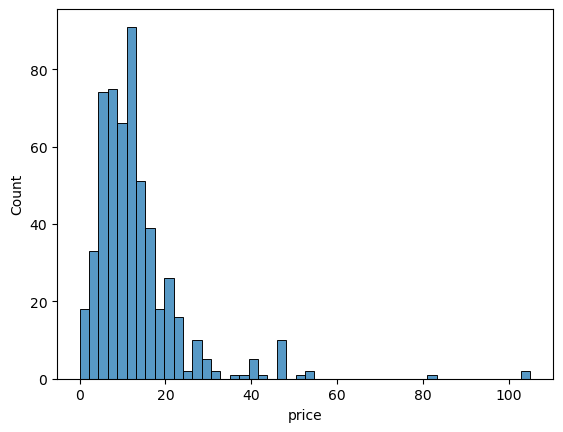

In [54]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import seaborn as sns


sns.histplot(x='price', data=bestsellers)


In [55]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(bestsellers["price"].max())
print(bestsellers["price"].min())
print(bestsellers["price"].mean())
print(bestsellers["price"].median())

# Максимальна ціна?
# Відповідь: 105
# Мінімальна ціна?
# Відповідь: 0
# Середня ціна?
# Відповідь: 13.1
# Медіанна ціна?
# Відповідь: 11.0

105
0
13.1
11.0


In [56]:
# Який рейтинг у датасеті найвищий?
# Відповідь: 4.9

max_rating = bestsellers["user_rating"].max()
max_rating

4.9

In [57]:
# Скільки книг мають такий рейтинг?
# Відповідь: 52

bestsellers[bestsellers["user_rating"] == max_rating].shape

(52, 7)

In [58]:
# Яка книга має найбільше відгуків?
# Відповідь:Where the Crawdads Sing

bestsellers[bestsellers["reviews"] == bestsellers["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [59]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
# Відповідь: Publication Manual of the American Psychological Association, 6th Edition

bestsellers_2015 = bestsellers[bestsellers["year"] == 2015]
bestsellers_2015[bestsellers_2015["price"] == bestsellers_2015["price"].max()].values

array([['Publication Manual of the American Psychological Association, 6th Edition',
        'American Psychological Association', 4.5, 8580, 46, 2015,
        'Non Fiction']], dtype=object)

In [60]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
# Відповідь: 20

bestsellers[(bestsellers["year"] == 2010) & (bestsellers["genre"] == "Fiction")].shape[0]


20

In [61]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
# Відповідь: 1

bestsellers[(bestsellers["user_rating"] == 4.9) & (bestsellers["year"] == 2010 | 2011)].shape[0]

1

In [62]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
# Яка книга остання у відсортованому списку?
# Відповідь: Old School (Diary of a Wimpy Kid #10)

bestsellers[(bestsellers["price"] < 8) & (bestsellers["year"] == 2015)].sort_values("price").iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

In [63]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
# Максимальна ціна для жанру Fiction:
# Відповідь: 82
# Мінімальна ціна для жанру Fiction:
# Відповідь: 0
# Максимальна ціна для жанру Non Fiction:
# Відповідь: 105
# Мінімальна ціна для жанру Non Fiction:
# Відповідь: 0

bestsellers.groupby("genre").agg({"price": ['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [64]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
# Якої розмірності вийшла таблиця?
# Відповідь: (248, 1)
# Який автор має найбільше книг?
# Відповідь: Jeff Kinney
# Скільки книг цього автора?
# Відповідь: 12

books_by_author = bestsellers.groupby("author").agg({"name": "count"})
books_by_author.columns = ["count"]
print(books_by_author.shape)
books_by_author.sort_values("count", ascending=False).iloc[0]

(248, 1)


count    12
Name: Jeff Kinney, dtype: int64

In [65]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
# У якого автора середній рейтинг мінімальний?
# Відповідь: Donna Tartt
# Який у цього автора середній рейтинг?
# Відповідь: 3.9

rating_by_author = bestsellers.groupby("author").agg({"user_rating": "mean"})
rating_by_author.columns = ["avg_rating"]
rating_by_author[rating_by_author["avg_rating"] == rating_by_author["avg_rating"].min()]

,avg_rating
author,
Donna Tartt,3.9


In [66]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

count_rating = pd.concat([books_by_author, rating_by_author], axis=1)
count_rating

,count,avg_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [67]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
# Який автор перший у списку?
# Відповідь: Muriel Barbery

count_rating.sort_values(["count", "avg_rating"])

,count,avg_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


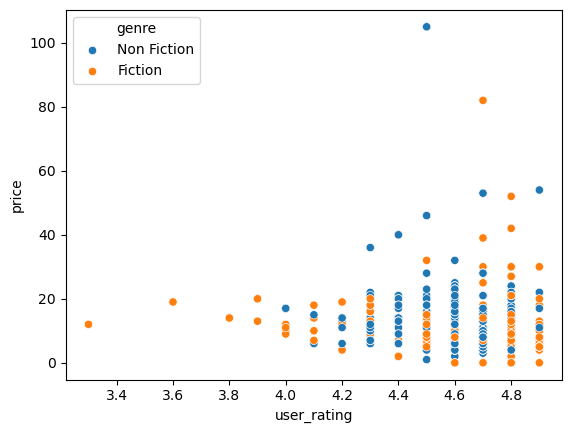

In [68]:
# додайте від 3 до 5 графіків функцій різного типу на ваш вибір
# 1
ax = sns.scatterplot(x='user_rating', y='price', hue="genre", data=bestsellers)
sns.move_legend(ax, "upper left")

<AxesSubplot: xlabel='year', ylabel='price'>

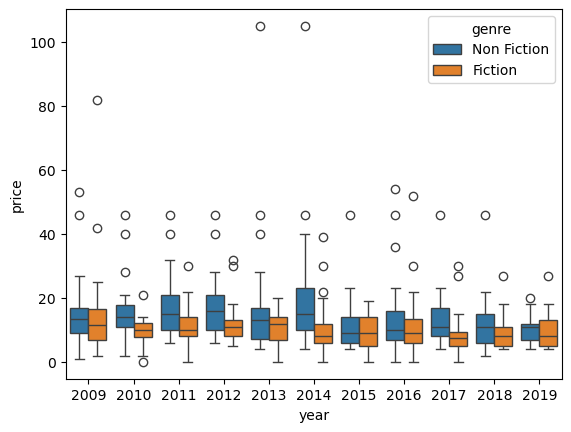

In [69]:
# 2
sns.boxplot(x="year", y="price", hue="genre", data=bestsellers)


<AxesSubplot: xlabel='reviews', ylabel='genre'>

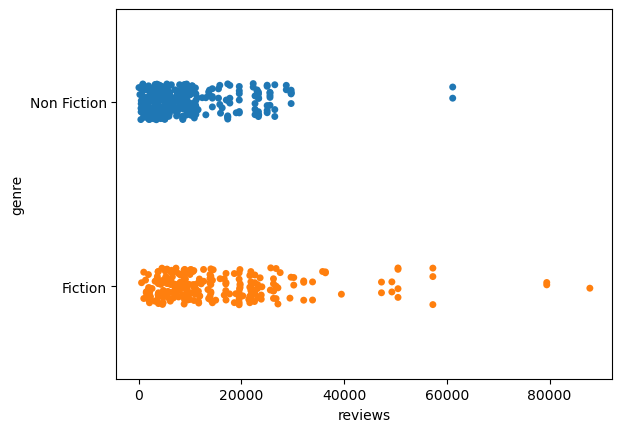

In [70]:
# 3
sns.stripplot(x="reviews", y="genre", hue="genre", data=bestsellers)
